In [57]:
import numpy as np
import pandas as pd
import math

column_names = ['nearc4', 'educ', 'age', 'black', 'wage', 'IQ', 'married', 'exper', 'lwage', 'expersq']
df = pd.read_csv('wage.csv')
t = pd.DataFrame(df, columns = column_names)
t.head()

#sample
sample = t.sample(n=30)

In [58]:
from scipy.stats import binom
print("1.")

black = t['black'] #table's black column
blackPercent = np.sum(black)/len(black)
print("Percent of black people: ", blackPercent*100, "%")
t2 = sample #30 samples from original table, aka subsample
black = t2['black']
blackCount30 = np.sum(black)
print("Number of black people in this sample of 30: ", blackCount30)
#x = number of black people, n = sample size, p = blackPercent
probabilityOf6Black = binom.pmf(6, 30, blackPercent)
print("The probability that there are 6 black ones: ", probabilityOf6Black*100, "%")

1.
Percent of black people:  23.35548172757475 %
Number of black people in this sample of 30:  8
The probability that there are 6 black ones:  16.2742603399912 %


In [59]:
from scipy.stats import hypergeom
print("2.")

t3 = t2.sample(n=5) #5 samples from table of 30
black = t3['black']
print("Number of black people in this sample of 5: ", np.sum(black)) 
#x = number of black people that we want, N = original size, K = number of black people that are already in, n = size that we choose to pick
probabilityAtLeast1Black = 1 - hypergeom.pmf(0, 30, blackCount30, 5)
print("Probability of at least 1 in 5 people is black: ", probabilityAtLeast1Black*100, "%")

2.
Number of black people in this sample of 5:  1
Probability of at least 1 in 5 people is black:  81.52077807250221 %


In [60]:
print("3.")

newT = pd.DataFrame({'black': [1]*blackCount30 + [0]*(len(df)-blackCount30)}) #generate new table with black count = subsample's black count
black = newT['black'] #table's black column
blackPercent = np.sum(black)/len(black)
print("Percent of black people: ", blackPercent*100, "%")
newT2 = newT.sample(n=30)
black = newT2['black']
newBlackCount30 = np.sum(black)
print("a) Number of black people I expect: ", 0)
print("b) Number of black people in the data: ", newBlackCount30)

3.
Percent of black people:  0.26578073089701 %
a) Number of black people I expect:  0
b) Number of black people in the data:  0


In [61]:
print("4.")

educ = t2['educ']
sampleMean = np.sum(educ)/len(educ)
#math.exp(x) = e^x; P(X = k) = (e^(-mean)*mean^k)/k!
prob6Educ = (math.exp(-sampleMean) * np.power(sampleMean, 6)) / math.factorial(6)
print("The probability of choosing a person with 6 years of education:", prob6Educ*100, "%")

4.
The probability of choosing a person with 6 years of education: 1.4356136022729584 %


5.
Mean:  29.0 , Variance:  10.0
Sample mean:  28.5 , Sample variance:  8.25


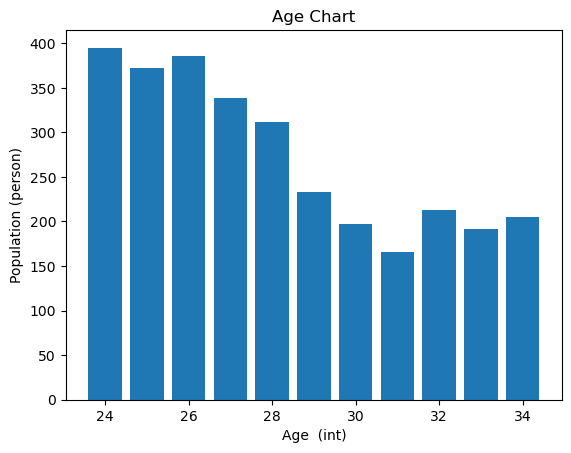

Based on the survey's data, age is not a uniform distribution.


In [62]:
import matplotlib.pyplot as plt
print("5.")

a = 24
b = 34
mean = (a + b)/2
variance = (np.power((b - a + 1), 2) - 1)/12
# print("Min: ", a, ", Max: ", b)
print("Mean: ", mean, ", Variance: ", variance)
a = t2['age'].min()
b = t2['age'].max()
meanSample = (a + b)/2
varianceSample = (np.power((b - a + 1), 2) - 1)/12
# print("Sample min: ", a, ", Sample max: ", b)
print("Sample mean: ", meanSample, ", Sample variance: ", varianceSample)

tAge = t['age'].value_counts()
tAge = tAge.sort_index(ascending=True)
# print(tAge)

# Define the data for the bar chart
x_values = tAge.index.tolist()
y_values = tAge.values.tolist()

# Create the bar chart
plt.bar(x_values, y_values)

# Add labels for the x and y axis and a title
plt.xlabel("Age  (int)")
plt.ylabel("Population (person)")
plt.title('Age Chart')

# Display the bar chart
plt.show()

print("Based on the survey's data, age is not a uniform distribution.")

In [63]:
from scipy.stats import norm
print("6.")

# set the mean and standard deviation
mu = 6.26
sigma = 0.44

# find the z-scores for the lower and upper bounds
z1 = (5 - mu) / sigma
z2 = (6 - mu) / sigma

# find the probability using the cumulative distribution function
prob = norm.cdf(z2) - norm.cdf(z1)

# print the result
print("The probability of lwage being between 5 and 6 is:", round(prob, 4))

6.
The probability of lwage being between 5 and 6 is: 0.2752


In [64]:
import numpy as np
from scipy.stats import norm
print("7.")

t2= t.sample(n=20)
IQ= t2['IQ']

# set the population mean and standard deviation
mu = np.mean(IQ)
sigma = np.std(IQ)

# set the sample size
n = 20

# calculate the standard deviation of the sample mean
se = sigma / np.sqrt(n)

# calculate the z-scores for the lower and upper bounds
z1 = (100 - mu) / se
z2 = (110 - mu) / se

# find the probability using the cumulative distribution function
prob = norm.cdf(z2) - norm.cdf(z1)

# print the result
print("a) The probability that the sample mean of IQ lies in [100, 110] is:", round(prob, 4))

# find the sample size for a standard error of 1
n = int(np.ceil(sigma**2))

# print the result
print("b) The sample size needed for a standard error of 1 is:", n)

7.
a) The probability that the sample mean of IQ lies in [100, 110] is: 0.4265
b) The sample size needed for a standard error of 1 is: 226


In [65]:
import pandas as pd
print("8.")

# read the data into a DataFrame object
data = pd.read_csv("wage.csv")

# calculate the summary statistics for each variable
wage_stats = data["wage"].describe()
iq_stats = data["IQ"].describe()
educ_stats = data["educ"].describe()
exper_stats = data["exper"].describe()

# print the summary statistics
print("Summary statistics for wage:\n", wage_stats)
print('')
print("Summary statistics for IQ:\n", iq_stats)
print('')
print("Summary statistics for educ:\n", educ_stats)
print('')
print("Summary statistics for exper:\n", exper_stats)

8.
Summary statistics for wage:
 count    3010.000000
mean      577.282392
std       262.958302
min       100.000000
25%       394.250000
50%       537.500000
75%       708.750000
max      2404.000000
Name: wage, dtype: float64

Summary statistics for IQ:
 count    2061.000000
mean      102.449782
std        15.423756
min        50.000000
25%        93.000000
50%       103.000000
75%       113.000000
max       149.000000
Name: IQ, dtype: float64

Summary statistics for educ:
 count    3010.000000
mean       13.263455
std         2.676913
min         1.000000
25%        12.000000
50%        13.000000
75%        16.000000
max        18.000000
Name: educ, dtype: float64

Summary statistics for exper:
 count    3010.000000
mean        8.856146
std         4.141672
min         0.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        23.000000
Name: exper, dtype: float64


In [66]:
import pandas as pd
print("9.")

# read the data into a DataFrame object
data = pd.read_csv("wage.csv")

# calculate the sample mean and sample variance of IQ
iq_mean = data["IQ"].mean()
iq_var = data["IQ"].var()

# print the point estimates
print("The point estimation of mean of IQ is:", round(iq_mean, 2))
print("The point estimation of variance of IQ is:", round(iq_var, 2))

9.
The point estimation of mean of IQ is: 102.45
The point estimation of variance of IQ is: 237.89


In [67]:
import scipy.stats as stats
print("10.")

lwage_std_dev = 0.44   # standard deviation of lwage
n = len(t['lwage']) 

# The 95% confidence level corresponds to a significance level of alpha = 0.05
alpha = 0.05

# Calculate the critical value using the t-distribution
df = n - 1   # degrees of freedom
t_crit = stats.t.ppf(1 - alpha/2, df)

# Calculate the margin of error
margin_of_error = t_crit * (lwage_std_dev / (n**0.5))

# Calculate the confidence interval
lwage_mean = 6.306275   # assumed mean value of lwage
lower_bound = lwage_mean - margin_of_error
upper_bound = lwage_mean + margin_of_error

print("95% Confidence Interval: ({:.2f}, {:.2f})".format(lower_bound, upper_bound))

10.
95% Confidence Interval: (6.29, 6.32)


In [68]:
import pandas as pd
import numpy as np
from scipy.stats import t
print("11.")

# Read data from CSV file
df = pd.read_csv("wage.csv")

# Remove NaN values from IQ column
df = df[~np.isnan(df["IQ"])]

# Extract IQ data from table
sample_iq = df["IQ"].sample(30).tolist()

# Calculate sample mean and standard deviation
sample_mean = np.mean(sample_iq)
sample_std = np.std(sample_iq, ddof=1)

# Set confidence level
confidence_level = 0.96

# Calculate degrees of freedom
df = len(sample_iq) - 1

# Calculate critical value
alpha = 1 - confidence_level
t_crit = t.ppf(1 - alpha/2, df)

# Calculate margin of error
moe = t_crit * sample_std / np.sqrt(len(sample_iq))

# Calculate lower and upper bounds of confidence interval
lower_bound = sample_mean - moe
upper_bound = sample_mean + moe

# Print results
print("Sample mean: {:.2f}".format(sample_mean))
print("Margin of error: {:.2f}".format(moe))
print("Confidence interval: ({:.2f}, {:.2f})".format(lower_bound, upper_bound))

11.
Sample mean: 100.37
Margin of error: 5.53
Confidence interval: (94.84, 105.90)


In [69]:
import pandas as pd
import numpy as np
from scipy import stats
print("12.")

# load data from csv file
data = pd.read_csv('wage.csv')

# calculate required sample size
z_score = stats.norm.ppf(0.975)  # for 95% confidence 2 sides
sigma = 0.44
error = 0.2
n = ((z_score * sigma) / error) ** 2

print("The required sample size is:", np.ceil(n))

12.
The required sample size is: 19.0


In [70]:
import pandas as pd
from scipy import stats
print("13.")

# load data from csv file
data = pd.read_csv('wage.csv')

# calculate sample proportion of nearc4
p_hat = data['nearc4'].sum() / len(data)

# calculate standard deviation of population
sigma = ((p_hat * (1 - p_hat)) / len(data)) ** 0.5

# calculate z-score for 99% confidence interval
z_score = stats.norm.ppf(0.99)

# calculate margin of error and confidence interval
margin_of_error = z_score * (sigma / (len(data) ** 0.5))
confidence_interval = (p_hat - margin_of_error, p_hat + margin_of_error)

print("The 99% confidence interval is:", confidence_interval)

13.
The 99% confidence interval is: (0.6816998921586691, 0.6824197091702345)


In [71]:
import pandas as pd
from scipy.stats import norm
print("14.")

# load data from wage.csv file
df = pd.read_csv("wage.csv")

# find critical value for 99% confidence level
Z = norm.ppf(0.99)

# calculate sample size for proportion
p_hat = df[df["black"] == 1]["black"].count()/len(df)
E = 0.01
n = (Z**2 * p_hat * (1 - p_hat)) / E**2

# round up the sample size to the nearest integer
n = int(round(n))

# count the number of observations where black=1
num_black = df[df["black"] == 1]["black"].count()

# calculate the proportion of blacks in the sample
p = num_black / n

# calculate the lower and upper bounds of the confidence interval
lower = p - Z * (p*(1-p)/n)**0.5
upper = p + Z * (p*(1-p)/n)**0.5

# print the results
print(f"Proportion of blacks: {p:.4f}")
print(f"99% Confidence interval: [{lower:.4f}, {upper:.4f}]")
print(f"Sample size should be used: {n}")

14.
Proportion of blacks: 0.0726
99% Confidence interval: [0.0664, 0.0787]
Sample size should be used: 9688


In [72]:
# question_15
import numpy as np
from scipy.stats import norm
print("15.")
print("Null hypothesis: mean(IQ) = 100, Alternate hypothesis: mean(IQ) != 100")

df = pd.read_csv('wage.csv')
t = pd.DataFrame(df, columns = column_names)

# Define the sample data
sample = t['IQ'].sample(n=30)

# Remove the NaN values
sample = np.array(sample)
sample = sample[~np.isnan(sample)]

# Define the null and alternative hypotheses
mu_0 = 100
alpha = 0.02
n = len(sample)
std = 15

# Calculate the test statistic
z_0 = (np.mean(sample) - mu_0) / (std / np.sqrt(n))

# Calculate the critical values
z_alpha = norm.ppf(alpha/2), norm.ppf(1-alpha/2)

print("z_0:", z_0)
print("z_alpha:", z_alpha)

# Make a decision and interpret the results
if np.abs(z_0) > norm.ppf(1-alpha/2):
    print("Reject the null hypothesis")
elif np.abs(z_0) < norm.ppf(alpha/2):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

15.
Null hypothesis: mean(IQ) = 100, Alternate hypothesis: mean(IQ) != 100
z_0: 1.8761663039293721
z_alpha: (-2.3263478740408408, 2.3263478740408408)
Fail to reject the null hypothesis


In [73]:
# question_16
import numpy as np
from scipy.stats import t as st
import pandas as pd
print("16.")
print("Null hypothesis: mean(lwage) = 6, Alternate hypothesis: mean(lwage) > 6 ")

sample = t['lwage'].sample(n=30)
lwage = np.array(sample)

# calculate sample mean, standard deviation, and size
x_bar = np.mean(lwage)
s = np.std(lwage, ddof=1)
n = len(lwage)

# set null hypothesis and significance level
mu_0 = 6
alpha = 0.1

# calculate t-statistic
t_0 = (x_bar - mu_0) / (s / np.sqrt(n))
print("t_0: {:.2f}".format(t_0))

# find critical value
df = n - 1
t_alpha = st.ppf(1 - alpha, df)
print("t_alpha: {:.2f}".format(t_alpha))

# check
if t_0 > t_alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

16.
Null hypothesis: mean(lwage) = 6, Alternate hypothesis: mean(lwage) > 6 
t_0: 3.32
t_alpha: 1.31
Reject null hypothesis


In [74]:
# question_17:
import math
from scipy.stats import norm
print("17.")
print("Null hypothesis: proportion with exper < 10 is <= 0.07")

# Sample size
n = len(t['exper'])

# Number of people with less than 10 years of work experience
x = len(t[t['exper'] < 10])

# Null hypothesis proportion
p0 = 0.07

# Sample proportion
p_hat = x / n

# Test statistic
z0 = (p_hat - p0) / math.sqrt(p0*(1-p0)/n)

# Calculate the critical value for one-tailed test with alpha=0.02
alpha = 0.02
z_alpha = norm.ppf(1-alpha, loc=0, scale=1)

print("z_0 : {:.2f}".format(z0))
print("z_alpha : {:.2f}".format(z_alpha))

# Check 
if z0 > z_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

17.
Null hypothesis: proportion with exper < 10 is <= 0.07
z_0 : 117.11
z_alpha : 2.05
Reject the null hypothesis


In [75]:
# question_18:
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
print("18.")

#sample
sample = t.sample(n=30)

#a))))))))))))))
black_wages = np.array(sample[sample['black'] == 1]['wage'])
nonblack_wages = np.array(sample[sample['black'] != 1]['wage'])

alpha = 0.01

# Calculate the t-statistic and p-value using the ttest_ind function
# t = (x1_bar - x2_bar) / sqrt[(s1^2 / n1) + (s2^2 / n2)]
# s = sqrt(sum((x - x_bar)^2) / (n - 1))
t_0, p_value = ttest_ind(black_wages, nonblack_wages, equal_var=True)

t_alpha = st.ppf(1 - alpha, len(black_wages)+len(nonblack_wages)-2)
# Print the results
print("a)")
print("Null hypothesis: mean of black wage = mean of non-black wage")
print("t_0:", t_0)
print("t_alpha:", t_alpha)
if np.abs(t_0) > st.ppf(1-alpha/2, len(black_wages)+len(nonblack_wages)-2):
    print("Reject the null hypothesis")
elif np.abs(t_0) < st.ppf(alpha/2, len(black_wages)+len(nonblack_wages)-2):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis.")

#b))))))))))))))))
black_iq = np.array(sample[sample['black'] == 1]['IQ'])
nonblack_iq = np.array(sample[sample['black'] != 1]['IQ'])

# Calculate the sample proportions and sizes
p1 = np.sum(black_iq < 90) / len(black_iq)
p2 = np.sum(nonblack_iq < 90) / len(nonblack_iq)

n1 = len(black_iq)
n2 = len(nonblack_iq)

# Calculate the pooled proportion and standard error
p_pool = (np.sum(black_iq < 90) + np.sum(nonblack_iq < 90)) / (n1 + n2)
z_0 = (p1-p2)/np.sqrt((p_pool * (1 - p_pool) / n1) + (p_pool * (1 - p_pool) / n2))

# Print the results
print("b)")
print("Null hypothesis: proportion of blackIQ < 90 = proportion of non-blackIQ < 90")
print("z_0:", z_0)
print("z_alpha:", stats.norm.ppf(1-0.05/2))
if abs(z_0) > stats.norm.ppf(1-0.05/2):
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")
    
#c))))))))))))))))
black_lwages = np.array(sample[sample['black'] == 1]['lwage'])
nonblack_lwages = np.array(sample[sample['black'] != 1]['lwage'])

alpha = 0.01
f_stat, p_value = stats.f_oneway(black_lwages, nonblack_lwages)

print("c)")
print("Null hypothesis: variance of black lwage = variance of non-black lwage")
print("p_value:", p_value)
print("alpha:", alpha)
if p_value/2 < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

18.
a)
Null hypothesis: mean of black wage = mean of non-black wage
t_0: -3.0436434800464225
t_alpha: 2.4671400979674316
Reject the null hypothesis
b)
Null hypothesis: proportion of blackIQ < 90 = proportion of non-blackIQ < 90
z_0: -1.0072203103706698
z_alpha: 1.959963984540054
Fail to reject the null hypothesis.
c)
Null hypothesis: variance of black lwage = variance of non-black lwage
p_value: 0.0015322409637097932
alpha: 0.01
Reject the null hypothesis.


In [76]:
#question_19
import statsmodels.api as sm
print("19.")

# define the dependent and independent variables
y = sample['wage']
X = sample['educ']

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

B1 = model.params['educ']
B0 = model.params['const']
p_value = model.pvalues['educ']
r_squared = model.rsquared

print("a)")
print("Slope coefficient (B1): ", B1)
print("Intercept (B0): ", B0)

print("b)")
print("Null hypothesis (H0: B1 = 0)")
print("Alpha:", 0.1)
print('p-value for B1:', p_value)
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")
    
print("c)")
print("Coefficient of determination: ", r_squared)
print("About {:.2f}% of the  variation in wages can be explained by the educ level".format(r_squared*100))

19.
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     11.87
Date:                Thu, 23 Mar 2023   Prob (F-statistic):            0.00182
Time:                        15:10:15   Log-Likelihood:                -206.45
No. Observations:                  30   AIC:                             416.9
Df Residuals:                      28   BIC:                             419.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5614    173.452      0.101     

In [77]:
#question_20
print("20.")
r_squared1 = r_squared
print("Coefficient of determination educ on wage: ", r_squared1)

X = sample['educ']
y = sample['lwage']

# add constant term to X
X = sm.add_constant(X)

# fit OLS regression model
model = sm.OLS(y, X).fit()

r_squared2 = model.rsquared
print("Coefficient of determination educ on lwage: ", r_squared2)
if r_squared1 < r_squared2:
    print("The model of educ on lwage is better because it has higher coefficient of determination.")
else:
    print("The model of educ on wage is better because it has higher coefficient of determination.")

20.
Coefficient of determination educ on wage:  0.297713962633646
Coefficient of determination educ on lwage:  0.33157096168186917
The model of educ on lwage is better because it has higher coefficient of determination.
